Customer Clustering!

In [74]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [24]:
#Get preprocessed final table
cust_data = pd.read_csv('../data/profile_labelled.csv')
cust_data.head()

,Unnamed: 0,gender,age,cust_id,became_member_on,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,...,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days,customer_type
0,0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1229,1.0,2.0,0.0,...,77.01,3.333333,144.000000,5.0,5.0,0.00,0.500,25.67,0.002441,passive
1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1296,3.0,4.0,4.0,...,159.27,5.454545,137.454545,20.0,20.0,1.00,0.750,22.75,0.005401,active
2,2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,944,2.0,4.0,3.0,...,57.73,7.222222,184.000000,7.0,9.0,0.75,0.500,19.24,0.003178,passive
3,3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,1020,5.0,6.0,6.0,...,36.43,6.764706,163.764706,19.0,24.0,1.00,0.833,12.14,0.002941,active
4,4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,1110,1.0,3.0,2.0,...,15.62,7.333333,192.000000,2.0,5.0,0.67,0.333,3.90,0.003604,passive


In [25]:
#dropping columns that are not required for clustering
cust_data.drop(['cust_id','became_member_on','customer_type','Unnamed: 0'], axis=1, inplace=True)
cust_data.sample(5)

,gender,age,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,...,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days
4964,M,72,74000.0,892,2.0,3.0,3.0,3.0,2.0,1.0,...,0.0,77.03,10.000000,195.000000,4.0,14.0,1.0,0.667,25.68,0.003363
10283,M,60,74000.0,1197,0.0,4.0,4.0,1.0,0.0,0.0,...,1.0,4.03,7.500000,150.000000,0.0,14.0,1.0,0.000,4.03,0.000835
12606,F,79,61000.0,2190,2.0,4.0,4.0,6.0,2.0,2.0,...,2.0,96.57,6.000000,100.800000,20.0,20.0,1.0,0.500,16.10,0.002740
6951,M,52,65000.0,1030,3.0,5.0,5.0,9.0,3.0,1.0,...,2.0,135.37,6.230769,138.461538,7.0,7.0,1.0,0.600,15.04,0.008738
11234,F,70,42000.0,1143,0.0,5.0,3.0,5.0,0.0,0.0,...,1.0,7.59,4.375000,141.000000,0.0,12.0,0.6,0.000,1.52,0.004374


In [26]:
#Conerting genders into numeric data
cust_data['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [27]:
cust_data['gender'].replace({'M':0, 'F':1,'O':2},inplace=True)
cust_data.head()

,gender,age,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,...,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days
0,1,55,112000.0,1229,1.0,2.0,0.0,3.0,1.0,0.0,...,0.0,77.01,3.333333,144.000000,5.0,5.0,0.00,0.500,25.67,0.002441
1,1,75,100000.0,1296,3.0,4.0,4.0,7.0,3.0,2.0,...,1.0,159.27,5.454545,137.454545,20.0,20.0,1.00,0.750,22.75,0.005401
2,0,68,70000.0,944,2.0,4.0,3.0,3.0,2.0,1.0,...,0.0,57.73,7.222222,184.000000,7.0,9.0,0.75,0.500,19.24,0.003178
3,0,65,53000.0,1020,5.0,6.0,6.0,3.0,5.0,3.0,...,0.0,36.43,6.764706,163.764706,19.0,24.0,1.00,0.833,12.14,0.002941
4,0,58,51000.0,1110,1.0,3.0,2.0,4.0,1.0,1.0,...,0.0,15.62,7.333333,192.000000,2.0,5.0,0.67,0.333,3.90,0.003604


In [60]:
#Standardscaler to scale the data
cust_data_scaled = StandardScaler().fit_transform(cust_data)
cust_data_scaled

array([[ 1.06355702,  0.03488876,  2.15741893, ...,  0.05456744,
         0.65169175, -1.03686871],
       [ 1.06355702,  1.18543027,  1.60180089, ...,  0.81545677,
         0.47484409, -0.19796899],
       [-0.84253979,  0.78274074,  0.2127558 , ...,  0.05456744,
         0.2622635 , -0.82802208],
       ...,
       [-0.84253979, -0.31027369,  0.35166031, ..., -1.46721122,
        -0.60198861, -0.10809576],
       [ 1.06355702,  1.64564687, -0.71327427, ...,  1.5763461 ,
        -0.08234718,  0.57268731],
       [ 1.06355702,  0.43757829,  0.76837384, ...,  0.05456744,
         0.54085914, -0.33718482]])

### K Means Clustering to find the number of Customer clusters

In [122]:
#choosing value of k as 12
##for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
scores = []
K_values = range(1,12)
for k in K_values:
    k_means = KMeans(n_clusters = k)
    model = k_means.fit(cust_data)
    scores.append(k_means.inertia_)

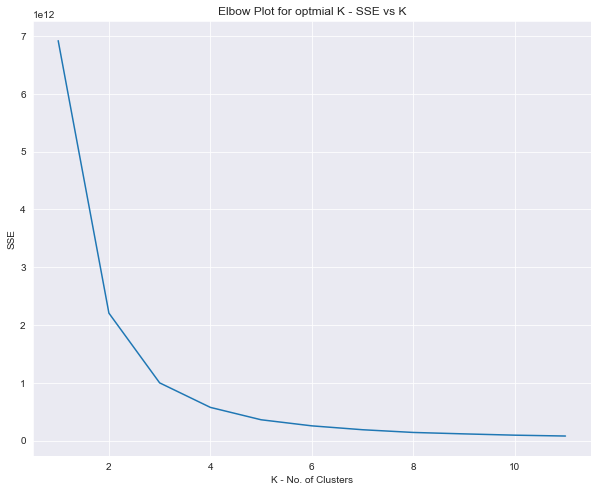

In [123]:
#Elbow plot with a line graph
size = (10, 8)
fig, ax = plt.subplots(figsize=size)
sns.set_style('darkgrid')
chart=sns.lineplot(ax=ax, x=K_values, y =scores)
plt.xlabel("K - No. of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Plot for optmial K - SSE vs K")

plt.show(chart)

### From the above graph we see that the elbow point is at k=5

In [129]:
#We can verify this by calculating the Silhouette coefficient and Calinski Harabasz Scores for k=5 and other values
#k=5
k_means = KMeans(n_clusters = 5)
k_means.fit(cust_data)
predicted = k_means.predict(cust_data)
labels = k_means.labels_
sc = metrics.silhouette_score(cust_data, labels, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(cust_data, labels)
print("k = 5, The silhouette_score is :", sc, "Calinski Harabasz Score is: ",ch)


k = 5, The silhouette_score is : 0.5677623676484828 Calinski Harabasz Score is:  67263.36186182189


In [130]:
#k=4
k_means = KMeans(n_clusters = 4)
k_means.fit(cust_data)
predicted = k_means.predict(cust_data)
labels = k_means.labels_
sc = metrics.silhouette_score(cust_data, labels, metric = 'euclidean')
ch = metrics.calinski_harabasz_score(cust_data, labels)
print("k = 4, The silhouette_score is :", sc, "Calinski Harabasz Score is: ",ch)


k = 4, The silhouette_score is : 0.5587392359241212 Calinski Harabasz Score is:  54634.13086830973


### Both the scores are greater for k=5, so we will categorize customer into 5 clusters